In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import altair as alt
from vega_datasets import data as vega_data

In [239]:
df = pd.read_csv('data/ACS_17_5YR_S1901_with_ann.csv', encoding='ISO-8859-1', skiprows=1)
old_df = pd.read_csv('data/ACS_09_5YR_S1901_with_ann.csv', encoding='ISO-8859-1', skiprows=1)
df_unemployment = pd.read_csv('data/Unemployment.csv').dropna()


In [240]:
old_df = old_df[['Id2', 'Households; Estimate; Median income (dollars)', 'Families; Estimate; Median income (dollars)', 'Households; Estimate; Mean income (dollars)', 'Families; Estimate; Mean income (dollars)', 'Households; Estimate; Total', 'Families; Estimate; Total']]
old_df.columns



Index(['Id2', 'Households; Estimate; Median income (dollars)',
       'Families; Estimate; Median income (dollars)',
       'Households; Estimate; Mean income (dollars)',
       'Families; Estimate; Mean income (dollars)',
       'Households; Estimate; Total', 'Families; Estimate; Total'],
      dtype='object')

In [251]:
trimmed_old = old_df[['Id2', 'Families; Estimate; Total', 'Households; Estimate; Total']]
trimmed_old.rename(columns={'Families; Estimate; Total': 'old_families', 'Households; Estimate; Total': 'old_households'}, inplace=True)
df.head()
df = df[['Id2', 'Households; Estimate; Median income (dollars)', 'Families; Estimate; Median income (dollars)', 'Households; Estimate; Mean income (dollars)', 'Families; Estimate; Mean income (dollars)', 'Households; Estimate; Total', 'Families; Estimate; Total']]


df = pd.merge(left=df, right=df_unemployment, how='left', left_on='Id2', right_on='FIPStxt')
df = pd.merge(left=df, right=trimmed_old, how='left', left_on='Id2', right_on='Id2')

df['id'] = df['Id2']
df['diff'] = df['Households; Estimate; Total'] / df['old_households']




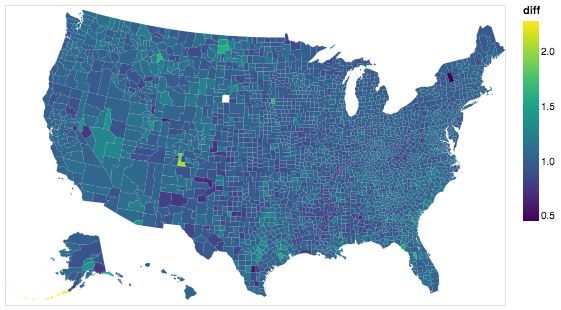

In [252]:
counties = alt.topo_feature(vega_data.us_10m.url, 'counties')

states = alt.topo_feature(vega_data.us_10m.url, 'states')

outlines = alt.Chart(states).mark_geoshape(
    stroke='black'
).project('albersUsa')
    
colors = alt.Chart(counties).mark_geoshape().encode(
    color='diff:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'id', ['diff'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)
colors 
# chart = colors + outlines 
# chart.save('overperformance_choropleth.html')

(0, 20000000000000)

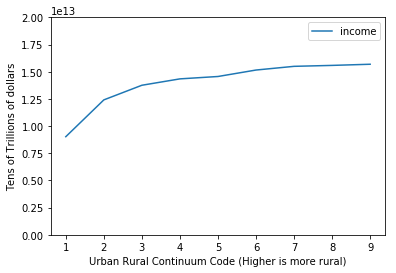

In [151]:
myplt = df.groupby('Rural_urban_continuum_code_2013').sum()[['income']].cumsum().plot()
myplt.set_xlabel('Urban Rural Continuum Code (Higher is more rural)')
myplt.set_ylabel('Tens of Trillions of dollars')
myplt.set_ylim(0,20000000000000)